In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv('/content/cars.csv')

dataset = dataset.drop('car_names', axis=1)

X = dataset.drop('miles_per_gallon', axis=1)
y = dataset['miles_per_gallon']

In [4]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state = 42)
X_train.shape


(19, 10)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [14]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


In [15]:
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [16]:
theta = np.zeros(X_train_b.shape[1])
learning_rate = 0.01
iterations = 1000
theta, cost_history = gradient_descent(X_train_b, y_train, theta, learning_rate, iterations)

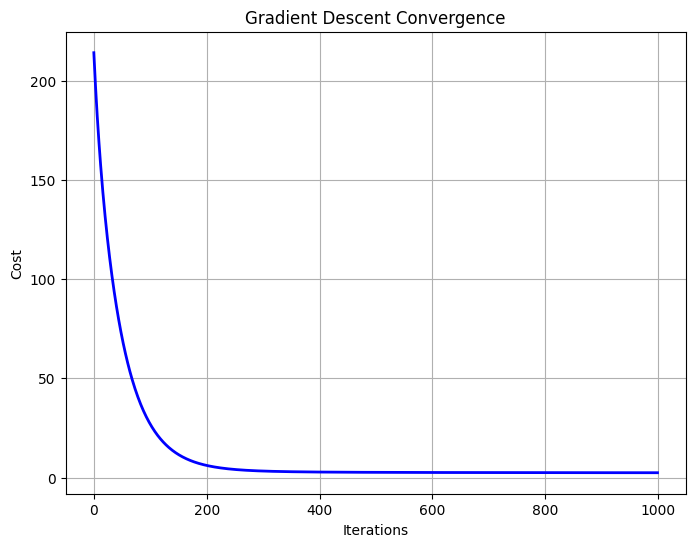

In [17]:
plt.figure(figsize=(8,6))
plt.plot(range(iterations), cost_history, color='blue', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')
plt.grid()
plt.show()
